In [8]:
import pandas as pd

In [11]:
data = pd.read_csv("data_lt_1.csv")

In [12]:
data

,objID,run,ra,dec,rerun,camcol,field,z,zErr,rChi2,z_range
0,1237645942905504034,109,57.089447,0.136492,301,4,150,0.166690,0.000006,1.315279,lt_1
1,1237645942905569679,109,57.229650,0.014525,301,4,151,0.499967,0.000116,1.168734,lt_1
2,1237645942905635226,109,57.380089,0.130207,301,4,152,0.173202,0.000011,1.142100,lt_1
3,1237645942906028179,109,58.387196,0.065393,301,4,158,0.198512,0.000007,2.942970,lt_1
4,1237645942906028440,109,58.323072,0.121538,301,4,158,0.368695,0.000141,1.485770,lt_1
...,...,...,...,...,...,...,...,...,...,...,...
499418,1237661464920327359,3723,251.677648,23.826966,301,4,196,0.499490,0.000141,0.974687,lt_1
499419,1237661464920392894,3723,251.756870,23.730079,301,4,197,0.529422,0.000132,1.008880,lt_1
499420,1237661464920393216,3723,251.792416,23.808308,301,4,197,0.500006,0.000111,1.077218,lt_1
499421,1237661464920457374,3723,251.894250,23.699576,301,4,198,0.391515,0.000080,0.882577,lt_1


In [6]:
import pandas as pd
import numpy as np

In [14]:
hist, bin_edges = np.histogram(data['z'], bins='auto')

In [15]:
total_samples = 75000
bin_counts = hist
bin_proportions = bin_counts / bin_counts.sum()
samples_per_bin = (bin_proportions * total_samples).astype(int)

In [17]:
import pandas as pd
import numpy as np

# Example DataFrame
df = data
# Calculate proportional sampling
total_samples = 75000
bin_counts = hist
bin_proportions = bin_counts / bin_counts.sum()
samples_per_bin = (bin_proportions * total_samples).astype(int)

# Sample from each bin
sampled_df = pd.DataFrame()

for i in range(len(bin_edges) - 1):
    bin_mask = (df['z'] >= bin_edges[i]) & (df['z'] < bin_edges[i + 1])
    bin_df = df[bin_mask]
    n_samples = min(samples_per_bin[i], len(bin_df))  # Adjust sample size if necessary
    sampled_bin_df = bin_df.sample(n=n_samples, random_state=42, replace=False)
    sampled_df = pd.concat([sampled_df, sampled_bin_df], axis=0)

# If the total number of samples is less than desired, sample additional rows
if len(sampled_df) < total_samples:
    additional_samples = total_samples - len(sampled_df)
    remaining_df = df[~df.index.isin(sampled_df.index)]
    additional_sampled_df = remaining_df.sample(n=additional_samples, random_state=42, replace=False)
    sampled_df = pd.concat([sampled_df, additional_sampled_df], axis=0)

# Verify the sample
print(f"Sampled DataFrame has {len(sampled_df)} rows.")

Sampled DataFrame has 75000 rows.


<Axes: >

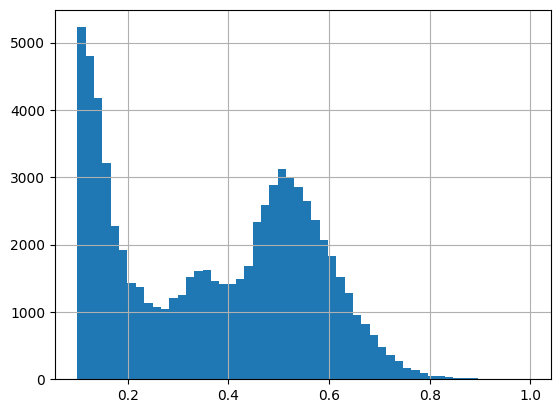

In [18]:
sampled_df['z'].hist(bins='auto')

In [22]:
sampled_df.reset_index(drop=True).to_csv("data_lt_1_sampled_75_k_rows.csv")

---